##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:*** 37

---
(*In Title case, separated with commas*)
***Full names of all students in the team: Aayush Roy, Yash Kant, Vaibhav Mittal, Siddhi Binayak Muduli, Devansh Verma***

---
(*Separated by commas*)
***Id number of all students in the team: 2021A3PS2801H, 2021A3PS2635H, 2021AAPS0737H, 2021A3PS2941H, 2021A8PS1687H***


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [8]:
##Installing required Libraries

##%pip install sdv
##%pip install urllib3==1.26

In [9]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [10]:
import random

In [11]:
#Uploading CSV
##from google.colab import files
##uploaded = files.upload()

In [12]:
## Reading the DataSet

# df = pd.read_csv(io.BytesIO(uploaded['diabetes2.csv']))
# df.dropna()
# df.head()

In [13]:
## Generating Synthetic Data

# from sdv.lite import SingleTablePreset
# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()
# metadata.detect_from_dataframe(data = df)

# synthesizer = SingleTablePreset(
#     metadata,
#     name='FAST_ML'
# )

# synthesizer.fit(df)
# synthetic_data = synthesizer.sample(
#     num_rows = 500
# )

# synthetic_data.head()





In [14]:
## Saving generated dataset to csv
# synthetic_data.to_csv('diabetes_synth.csv')

# Code Above this is not neccessary to run since it is only for dataset generation

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [15]:
sd = pd.read_csv('diabetes_synth.csv')
sd.head()

## By taking a quick look at the data we see that there are a lot of NaN values.


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,8.046627,137.341845,76.440333,32.825055,109.775892,33.403319,0.419852,46.426964,0.432231
1,1,2.827381,NaN,35.065757,9.030967,156.844543,NaN,NaN,24.396907,0.670039
2,2,2.956352,123.122827,NaN,34.146003,0.000000,33.502939,0.540255,21.000000,NaN
3,3,NaN,97.909669,90.531195,19.145994,11.053166,NaN,0.624517,23.294243,0.000000
4,4,0.000000,118.741228,86.693885,25.208403,52.438241,28.676574,0.293360,32.833095,0.000000


In [16]:
sd.isnull().sum().sum() ## This shows that we have 1105 null values


1105

In [17]:
##Data Preprocessing

sd_clear = sd.interpolate(method='linear')

sd_clear_rounded = sd_clear.round({
    "Pregnancies": 0,
    "Glucose":0,
    "BloodPressure":0,
    "SkinThickness":2,
    "Insulin":0,
    "BMI":1,
    "DiabetesPedigreeFunction":3,
    "Age": 0,
    "Outcome":0
    })

sd_clear_rounded.head()
##sd_clear_rounded['Outcome'].sum()



,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,8.0,137.0,76.0,32.83,110.0,33.4,0.420,46.0,0.0
1,1,3.0,130.0,35.0,9.03,157.0,33.5,0.480,24.0,1.0
2,2,3.0,123.0,63.0,34.15,0.0,33.5,0.540,21.0,0.0
3,3,1.0,98.0,91.0,19.15,11.0,31.1,0.625,23.0,0.0
4,4,0.0,119.0,87.0,25.21,52.0,28.7,0.293,33.0,0.0


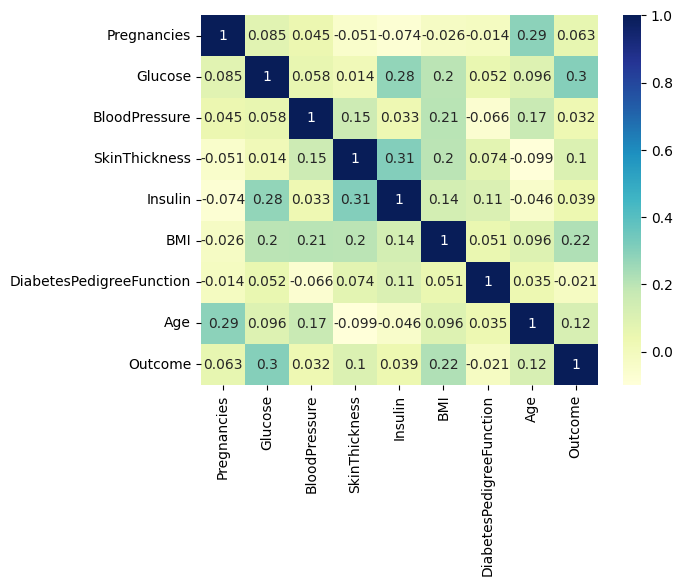

In [18]:
# Exploratory Analysis

# 1. Correleation Matrix
scr = sd_clear_rounded.drop('Unnamed: 0', axis = 1)
sns.heatmap(scr.corr(), cmap="YlGnBu", annot = True)
plt.show()

## **TARGET VARIABLE AND FEATURE SELECTION**


*   For linear and polynomial regression we will choose DiabetesPedigreeFunction as target variable since it is a continuous variable

*   For logisitc regression and LSC we will choose Outcome as target variable

*   For Regression we will consider all other features as input except the outcome and DPF since DPF is compareably correlated to all the features.



In [19]:
## Splitting Data for Training and Testing
scr_train = scr.sample(frac = 0.5)
scr_test = scr.drop(scr_train.index)

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [ ]:
## Scaling Features
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(scr_train.drop(columns = ['Outcome','DiabetesPedigreeFunction'], axis=1))
##scaled_x

scaled_y = sy.fit_transform(scr_train['DiabetesPedigreeFunction'].values.reshape(scr_train.shape[0],1))
##scaled_y

In [ ]:


def stochastic_gradient_descent(X, Y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.zeros(number_of_features)   ##returns a matrix containing zeros
  b = 0                              ## taking bias equal to zero
  total_samples = X.shape[0]

  costs = []          ## Maintaing these lists would help us to draw graphs later on
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = Y_true[random_index]

    y_pred = np.dot(w,sample_x.T) + b
    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_pred))
    b_grad = -(2/total_samples)*(sample_y - y_pred)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(Y_true - y_pred))
    if i%200 == 0:
      costs.append(cost)
      epoch_list.append(i)
  return w, b, cost, costs, epoch_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd =  stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),30000)
w_sgd, b_sgd, cost_sgd

## **_Batch Gradient Descent_**

In [ ]:
def batch_gradient_descent(X, Y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.zeros(number_of_features)   ##returns a matrix containing zeros
  b = 0                              ## taking bias equal to zero
  total_samples = X.shape[0]

  costs = []          ## Maintaing these lists would help us to draw graphs later on
  epoch_list = []

  for i in range(epochs):
    Y_pred = np.dot(w, X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(Y_true - Y_pred))
    b_grad = -(2/total_samples)*np.sum(Y_true - Y_pred)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(Y_true - Y_pred))
    if i%20 == 0:
      costs.append(cost)
      epoch_list.append(i)
  return w, b, cost, costs, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),2000)
w, b, cost


In [ ]:
##Prediction Function
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

x_test_input = scr_test.drop(columns = ['Outcome', 'DiabetesPedigreeFunction'], axis = 1)
y_true = scr_test['DiabetesPedigreeFunction']
i = 0
def predict(X,w,b):
  scaled_x_test = sx.transform(X)
  y_pred = []
  for x_test in scaled_x_test:
    scaled_dpf = np.dot(w, x_test.T) + b
    y_pred.append((sy.inverse_transform([[scaled_dpf]]))[0][0])
  return y_pred

y_pred = predict(x_test_input,w,b)

print("The Mean Squared Error between Train and Test data is: (Batch Gradient Descent) ", mean_squared_error(y_true, y_pred))

y_pred = predict(x_test_input,w_sgd,b_sgd)

print("The Mean Squared Error between Train and Test data is: (Stochastic Gradient Descent) ", mean_squared_error(y_true, y_pred))




## **_Insights drawn (plots, markdown explanations)_**

In [ ]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Batch Gradient Descent')
plt.plot(epoch_list,cost_list)
plt.show()

In [ ]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Stochastic Gradient Descent')
plt.plot(epoch_list_sgd,cost_list_sgd)

# **Insights and Analysis**
### The following inferences can be taken from the above implementation of both the algorithms

*   From the Graphs we can clearly see that Batch Gradient Descent(BGD) is more smooth as compared to Stochastic Gradient Descent(SGD).
*   The BGD requires less no. of iterations or epochs as comapred to SGD.
*   Also the BGD Flattens faster than SGD.
*   The minimum error that we get for BGD is 0.0328 (approx) and for SGD we get a min error of 0.03417 (approx).






# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [ ]:
def lasso(X,Y,learning_rate,lambda_parameter,epochs):
  m,n = X.shape
  w = np.zeros(n)   ##weights
  b = 0             ##bias

  for i in range(epochs):
    dw = np.zeros(n)
    b = 0
    y_pred = X.dot(w.T) + b

    for i in range(n):

      dw[i] = (-(2*(X[:,i]).dot(Y-y_pred))+ (2*lambda_parameter*np.sum(np.abs(w))))/m

      db = -2 * np.sum(Y - y_pred) / m

    w = w - learning_rate*dw
    b = b - learning_rate*db

  return w,b

w_lasso, b_lasso = lasso(scaled_x, scaled_y[:,0],0.01,3,10000)

## **_Ridge Regression_**

In [ ]:
def ridge(X,Y,learning_rate,lambda_parameter,epochs):
  m,n = X.shape
  w = np.zeros(n)   ##weights
  b = 0             ##bias

  for i in range(epochs):
    dw = np.zeros(n)
    b = 0
    y_pred = X.dot(w.T) + b

    for i in range(n):

      dw[i] = (-(2*(X[:,i]).dot(Y-y_pred))+ (2*lambda_parameter*np.sum(np.square(w))))/m

      db = -2 * np.sum(Y - y_pred) / m

    w = w - learning_rate*dw
    b = b - learning_rate*db

  return w,b

w_ridge, b_ridge = ridge(scaled_x,scaled_y[:,0],0.01,3,5000)

In [ ]:
##Testing Our Models
y_pred = predict(x_test_input,w_lasso,b_lasso)
print("The MSE for Lasso is: " , mean_squared_error(y_pred,y_true))

y_pred = predict(x_test_input,w_ridge,b_ridge)
print("The MSE for Ridge is: " , mean_squared_error(y_pred,y_true))

## **_Insights drawn (plots, markdown explanations)_**

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [ ]:
## Scaling Features
lg_sx = preprocessing.MinMaxScaler()
lg_sy = preprocessing.MinMaxScaler()
scaled_x_lg = lg_sx.fit_transform(scr_train.drop(columns = ['Outcome'], axis=1))
##scaled_x

scaled_y_lg = lg_sy.fit_transform(scr_train['Outcome'].values.reshape(scr_train.shape[0],1))
##scaled_y

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def logistic_regression(X, Y_true, epochs, learning_rate = 0.03):
  number_of_features = X.shape[1]

  w = np.zeros(number_of_features)   ##returns a matrix containing zeros
  b = 0                              ## taking bias equal to zero
  total_samples = X.shape[0]

  costs = []          ## Maintaing these lists would help us to draw graphs later on
  epoch_list = []

  for i in range(epochs):
    linear_model = np.dot(w, X.T) + b
    Y_pred = sigmoid(linear_model)

    w_grad = -(2/total_samples)*(X.T.dot(Y_true - Y_pred))
    b_grad = -(2/total_samples)*np.sum(Y_true - Y_pred)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(Y_true - Y_pred))
    if i%20 == 0:
      costs.append(cost)
      epoch_list.append(i)
  return w, b, cost, costs, epoch_list

w_lg, b_lg, cost_lg, cost_list_lg, epoch_list_lg = logistic_regression(scaled_x_lg,scaled_y_lg.reshape(scaled_y.shape[0]),30000)

w_lg, b_lg, cost_lg

In [ ]:
## Testing Our Model

x_test_input_lg = scr_test.drop(columns = ['Outcome'], axis = 1)
y_true = scr_test['Outcome']

def predict_classification(X,w,b):     ## Function that finds values for test sample
  scaled_x_test = lg_sx.transform(X)

  y_pred = []
  for x_test in scaled_x_test:
    scaled_dpf_lg = sigmoid(np.dot(w, x_test) + b)
    if lg_sy.inverse_transform([[scaled_dpf_lg]])[0][0] > 0.5 :
      y_pred.append(1.0)
    else:
      y_pred.append(0.0)


  return y_pred
y_true = y_true.values.tolist()
y_true
y_pred_lg = predict_classification(x_test_input_lg, w_lg, b_lg)

print("The Accuracy for Logistic Regression is: ", accuracy_score(y_pred_lg,y_true)*100)

## **_Least Squares Classification_**

In [ ]:
def lsc(X,y):
    X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
    lhs = np.dot(X_with_bias.T, X_with_bias)
    rhs = np.dot(X_with_bias.T, y)

    w = np.linalg.solve(lhs, rhs)
    return w

w_lsc = lsc(scaled_x_lg,scaled_y_lg)

w_lsc_flat = []
for w in w_lsc:
  w_lsc_flat.append(w[0])

w_lsc_flat

In [ ]:
x_test_input_lg = scr_test.drop(columns = ['Outcome'], axis = 1)
y_true = scr_test['Outcome']

def predict_lsc(X,w):     ## Function that finds values for test sample
  scaled_x_test = np.column_stack((np.ones(X.shape[0]), lg_sx.transform(X)))
  y_pred = []
  for x_test in scaled_x_test:
    scaled_dpf_lg = 1 - sigmoid(np.dot(w, x_test))
    if lg_sy.inverse_transform([[scaled_dpf_lg]])[0][0] > 0.5 :
      y_pred.append(1.0)
    else:
      y_pred.append(0.0)
  return y_pred

y_pred_lsc = predict_lsc(x_test_input_lg,w_lsc_flat)

print("The Accuracy for Least Square Classification is: ", accuracy_score(y_pred_lsc,y_true)*100)


## **_Insights drawn (plots, markdown explanations)_**

In [ ]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('Logistic Regression Descent')
plt.plot(epoch_list_lg,cost_list_lg)

# **Insights and Analysis**
### The following inferences can be taken from the above implementation of both the algorithms

*   The accuracy of Logistic Regression came out to be 68.0 and that of Least Square Classification comes out to be 60.4 percent.
*   Least Square Classification is implemented using Normal equation method.
*   The Graph and code of Logistic Regression and Linear regression is very similar except the fact that in Logistic Regression sigmoid is used and the values are rounded to 0 and 1
*   The Logistic Regression algorithim however required a higher learning rate and more no. of iteration
*   The accuracy show that logistic regression gives more accurate prediction that least square classification. This may be because LSC is not robust to outliers

# **_5. References_**

1.   https://numpy.org/doc/
2.   https://pandas.pydata.org/docs/
3.   https://scikit-learn.org/stable/modules/classes.html (ONLY FOR IMPLEMENTATION OF ACCURACY METRICS AND SCALING DATA)
